In [56]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [57]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [58]:
from sklearn.grid_search import GridSearchCV

In [59]:
df1 = pd.read_csv('feature.csv')

In [60]:
df1.head()

,uid,for_count,favorite_device,label,play_time,completion_ratio,win1,win2,win3,win4,win5,song language,song_type
0,0.0,193989,1,0,1.052149e+10,129.218331,16142.0,29143.0,74499.0,141200.0,182377.0,1,0.0
1,533817.0,82304,1,0,9.345974e+08,36.393828,2940.0,10078.0,24079.0,46313.0,75329.0,1,0.0
2,751824.0,7129,1,0,2.308999e+09,-321123.118894,NaN,NaN,1644.0,6880.0,6880.0,1,1.0
3,924065.0,29767,1,0,3.173783e+08,34.594272,516.0,764.0,2186.0,24489.0,29103.0,1,0.0
4,1342999.0,4004,1,0,3.983850e+05,0.533570,552.0,745.0,1316.0,2770.0,4000.0,1,0.0


In [61]:
x_y = df1

In [62]:
x_y['is_train'] = np.random.uniform(0, 1, len(df1)) <= .75
x_y.head()

,uid,for_count,favorite_device,label,play_time,completion_ratio,win1,win2,win3,win4,win5,song language,song_type,is_train
0,0.0,193989,1,0,1.052149e+10,129.218331,16142.0,29143.0,74499.0,141200.0,182377.0,1,0.0,False
1,533817.0,82304,1,0,9.345974e+08,36.393828,2940.0,10078.0,24079.0,46313.0,75329.0,1,0.0,True
2,751824.0,7129,1,0,2.308999e+09,-321123.118894,NaN,NaN,1644.0,6880.0,6880.0,1,1.0,True
3,924065.0,29767,1,0,3.173783e+08,34.594272,516.0,764.0,2186.0,24489.0,29103.0,1,0.0,True
4,1342999.0,4004,1,0,3.983850e+05,0.533570,552.0,745.0,1316.0,2770.0,4000.0,1,0.0,True


In [63]:
train, test = x_y[x_y['is_train']==True], x_y[x_y['is_train']==False]

In [64]:
x_y.isnull().sum()

uid                     0
for_count               0
favorite_device         0
label                   0
play_time               0
completion_ratio      190
win1                17039
win2                11987
win3                 7132
win4                 2993
win5                    3
song language           0
song_type               3
is_train                0
dtype: int64

In [65]:
x_y.loc[x_y.win1.isnull(),'win1'] = 0
x_y.loc[x_y.win2.isnull(),'win2'] = 0
x_y.loc[x_y.win3.isnull(),'win3'] = 0
x_y.loc[x_y.win4.isnull(),'win4'] = 0
x_y.loc[x_y.win5.isnull(),'win5'] = 0
x_y.loc[x_y.completion_ratio.isnull(),'completion_ratio'] = 0
x_y.loc[x_y.song_type.isnull(),'song_type'] = 5

In [66]:
xs = x_y.drop(['label', 'is_train', 'uid'],axis = 1)

In [67]:
features = xs.columns

In [68]:
features

Index([u'for_count', u'favorite_device', u'play_time', u'completion_ratio',
       u'win1', u'win2', u'win3', u'win4', u'win5', u'song language',
       u'song_type'],
      dtype='object')

In [69]:
x = x_y[features]

In [70]:
y = x_y['label']

In [71]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_test.shape, y_test.shape

((7617, 11), (7617L,))

In [44]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_jobs': [-1, 2],
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
print CV_rfc.best_params_

{'max_features': 'sqrt', 'n_estimators': 200, 'n_jobs': -1}


In [72]:
clf = RandomForestClassifier(n_jobs=-1, max_features = 'sqrt', min_samples_leaf=20, n_estimators = 200)

In [73]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [74]:
clf.score(x_train, y_train),clf.score(x_test, y_test)

(0.79665785179767057, 0.7613233556518314)

In [75]:
roc_auc_score(y_test, clf.predict(x_test))

0.76131357844518144

In [76]:
importance_coeff = clf.feature_importances_
importance_coeff

array([ 0.06621734,  0.00926839,  0.06124981,  0.05013258,  0.12706216,
        0.24954369,  0.22155953,  0.14333722,  0.06891522,  0.00151017,
        0.0012039 ])

In [77]:
df_coeffs = pd.DataFrame(list(zip(features, importance_coeff))).sort_values(by=[1], ascending=True)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs.iloc[::-1,:]

,feature,coeff
5,win2,0.249544
6,win3,0.221560
7,win4,0.143337
4,win1,0.127062
8,win5,0.068915
0,for_count,0.066217
2,play_time,0.061250
3,completion_ratio,0.050133
1,favorite_device,0.009268
9,song language,0.001510


In [79]:
import matplotlib.pyplot as plt

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

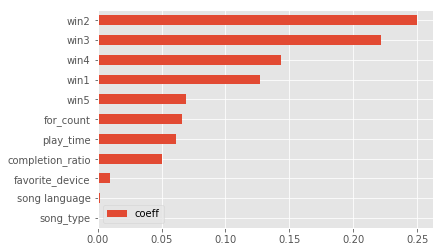

In [80]:
ax = df_coeffs.plot.barh()
t = np.arange(x.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.rcParams["figure.figsize"] = (8,10)
plt.show()

In [81]:
x_y_1 = x_y

In [100]:
# x_y_1['1over5'] = x_y['win1']/x_y['win5']
x_y_1['1over5'] = x_y['win1']/(x_y['win5']+1)

In [101]:
x_y_1['2over5'] = x_y['win2']/(x_y['win5']+1)
x_y_1['3over5'] = x_y['win3']/(x_y['win5']+1)
x_y_1['4over5'] = x_y['win4']/(x_y['win5']+1)
x_y_1['1over4'] = x_y['win1']/(x_y['win4']+1)
x_y_1['2over4'] = x_y['win2']/(x_y['win4']+1)
x_y_1['3over4'] = x_y['win3']/(x_y['win4']+1)
x_y_1['1over3'] = x_y['win1']/(x_y['win3']+1)
x_y_1['2over3'] = x_y['win2']/(x_y['win3']+1)
x_y_1['1over2'] = x_y['win1']/(x_y['win2']+1)

In [102]:
x_y_1.head()

,uid,for_count,favorite_device,label,play_time,completion_ratio,win1,win2,win3,win4,...,1over5,2over5,3over5,4over5,1over4,2over4,3over4,1over3,2over3,1over2
0,0.0,193989,1,0,1.052149e+10,129.218331,16142.0,29143.0,74499.0,141200.0,...,0.088508,0.159794,0.408487,0.774216,0.114319,0.206394,0.527610,0.216671,0.391181,0.553870
1,533817.0,82304,1,0,9.345974e+08,36.393828,2940.0,10078.0,24079.0,46313.0,...,0.039028,0.133785,0.319647,0.614802,0.063480,0.217602,0.519908,0.122093,0.418522,0.291696
2,751824.0,7129,1,0,2.308999e+09,-321123.118894,0.0,0.0,1644.0,6880.0,...,0.000000,0.000000,0.238919,0.999855,0.000000,0.000000,0.238919,0.000000,0.000000,0.000000
3,924065.0,29767,1,0,3.173783e+08,34.594272,516.0,764.0,2186.0,24489.0,...,0.017730,0.026251,0.075110,0.841431,0.021070,0.031196,0.089261,0.235940,0.349337,0.674510
4,1342999.0,4004,1,0,3.983850e+05,0.533570,552.0,745.0,1316.0,2770.0,...,0.137966,0.186203,0.328918,0.692327,0.199206,0.268856,0.474919,0.419134,0.565680,0.739946


In [103]:
xs_1 = x_y_1.drop(['label', 'is_train', 'uid'],axis = 1)
features = xs_1.columns

In [104]:
x_1 = x_y_1[features]
y_1 = x_y_1['label']

In [105]:
x_1.head()

,for_count,favorite_device,play_time,completion_ratio,win1,win2,win3,win4,win5,song language,...,1over5,2over5,3over5,4over5,1over4,2over4,3over4,1over3,2over3,1over2
0,193989,1,1.052149e+10,129.218331,16142.0,29143.0,74499.0,141200.0,182377.0,1,...,0.088508,0.159794,0.408487,0.774216,0.114319,0.206394,0.527610,0.216671,0.391181,0.553870
1,82304,1,9.345974e+08,36.393828,2940.0,10078.0,24079.0,46313.0,75329.0,1,...,0.039028,0.133785,0.319647,0.614802,0.063480,0.217602,0.519908,0.122093,0.418522,0.291696
2,7129,1,2.308999e+09,-321123.118894,0.0,0.0,1644.0,6880.0,6880.0,1,...,0.000000,0.000000,0.238919,0.999855,0.000000,0.000000,0.238919,0.000000,0.000000,0.000000
3,29767,1,3.173783e+08,34.594272,516.0,764.0,2186.0,24489.0,29103.0,1,...,0.017730,0.026251,0.075110,0.841431,0.021070,0.031196,0.089261,0.235940,0.349337,0.674510
4,4004,1,3.983850e+05,0.533570,552.0,745.0,1316.0,2770.0,4000.0,1,...,0.137966,0.186203,0.328918,0.692327,0.199206,0.268856,0.474919,0.419134,0.565680,0.739946


In [106]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.3, random_state=42)

x_test_1.shape, y_test_1.shape

((7617, 21), (7617L,))

In [107]:
x_1.isnull().sum()

for_count           0
favorite_device     0
play_time           0
completion_ratio    0
win1                0
win2                0
win3                0
win4                0
win5                0
song language       0
song_type           0
1over5              0
2over5              0
3over5              0
4over5              0
1over4              0
2over4              0
3over4              0
1over3              0
2over3              0
1over2              0
dtype: int64

In [108]:
# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(x_train_1, y_train_1)
# print CV_rfc.best_params_

{'max_features': 'log2', 'n_estimators': 200, 'n_jobs': 2}


In [109]:
clf = RandomForestClassifier(n_jobs=2, max_features = 'log2', min_samples_leaf=20, n_estimators = 200)

In [110]:
clf.fit(x_train_1, y_train_1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [111]:
clf.score(x_train_1, y_train_1),clf.score(x_test_1, y_test_1)

(0.80121532661902883, 0.7569909413154785)

In [112]:
importance_coeff = clf.feature_importances_
importance_coeff

array([ 0.03546296,  0.00577925,  0.04259202,  0.03103095,  0.02217883,
        0.1359921 ,  0.08640875,  0.05890645,  0.03509027,  0.00086232,
        0.00081679,  0.01693952,  0.09601088,  0.05918664,  0.03307196,
        0.01374352,  0.0965846 ,  0.06537509,  0.02446299,  0.11793288,
        0.02157123])

In [120]:
df_coeffs_1
df_coeffs['feature']

10           song_type
9        song language
1      favorite_device
3     completion_ratio
2            play_time
0            for_count
8                 win5
4                 win1
7                 win4
6                 win3
5                 win2
Name: feature, dtype: object

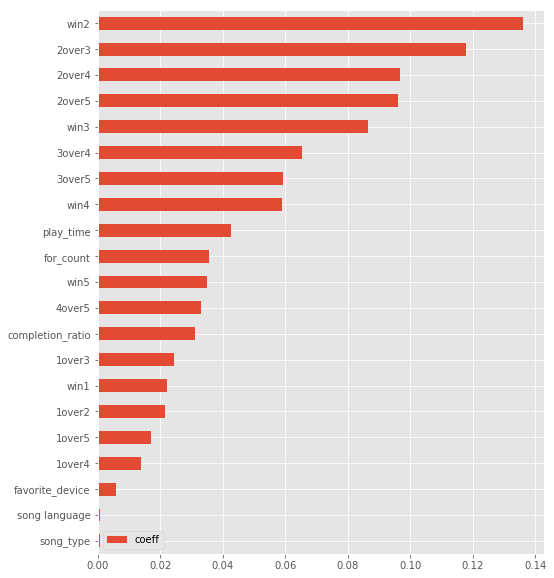

In [121]:
df_coeffs_1 = pd.DataFrame(list(zip(features, importance_coeff))).sort_values(by=[1], ascending=True)
df_coeffs_1.columns = ['feature', 'coeff']
ax = df_coeffs_1.plot.barh()
t = np.arange(x_1.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs_1['feature'])
plt.rcParams["figure.figsize"] = (8,10)
plt.show()

In [122]:
x_y_1.head()

,uid,for_count,favorite_device,label,play_time,completion_ratio,win1,win2,win3,win4,...,1over5,2over5,3over5,4over5,1over4,2over4,3over4,1over3,2over3,1over2
0,0.0,193989,1,0,1.052149e+10,129.218331,16142.0,29143.0,74499.0,141200.0,...,0.088508,0.159794,0.408487,0.774216,0.114319,0.206394,0.527610,0.216671,0.391181,0.553870
1,533817.0,82304,1,0,9.345974e+08,36.393828,2940.0,10078.0,24079.0,46313.0,...,0.039028,0.133785,0.319647,0.614802,0.063480,0.217602,0.519908,0.122093,0.418522,0.291696
2,751824.0,7129,1,0,2.308999e+09,-321123.118894,0.0,0.0,1644.0,6880.0,...,0.000000,0.000000,0.238919,0.999855,0.000000,0.000000,0.238919,0.000000,0.000000,0.000000
3,924065.0,29767,1,0,3.173783e+08,34.594272,516.0,764.0,2186.0,24489.0,...,0.017730,0.026251,0.075110,0.841431,0.021070,0.031196,0.089261,0.235940,0.349337,0.674510
4,1342999.0,4004,1,0,3.983850e+05,0.533570,552.0,745.0,1316.0,2770.0,...,0.137966,0.186203,0.328918,0.692327,0.199206,0.268856,0.474919,0.419134,0.565680,0.739946


In [123]:
x_y_1.to_csv('featureV1-1.csv')

In [146]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(penalty = 'l2',C= 1, n_jobs = -1)

In [147]:
accuracies = []
#accuracies.columns = ['regularization','Accuracy_score_train','Accuracy_score_test']
for c in [1e-3,1e-2,0.1,1,10,100,1000]:
    model_lr = LogisticRegression(penalty = 'l2',C= c, n_jobs = -1)
    model_lr.fit(x_train, y_train)
    accuracies.append([c,model_lr.score(x_train, y_train), model_lr.score(x_test, y_test)])
    
accuracies

[[0.001, 0.49462668092049739, 0.49875278981226207],
 [0.01, 0.49462668092049739, 0.49875278981226207],
 [0.1, 0.49462668092049739, 0.49875278981226207],
 [1, 0.49462668092049739, 0.49875278981226207],
 [10, 0.49462668092049739, 0.49875278981226207],
 [100, 0.49462668092049739, 0.49875278981226207],
 [1000, 0.49462668092049739, 0.49875278981226207]]

In [148]:
x_train.head()

,for_count,favorite_device,play_time,completion_ratio,win1,win2,win3,win4,win5,song language,song_type
12953,8,1,1191.0,0.529226,0.0,0.0,1.0,4.0,8.0,1,0.0
16078,97,1,20008.0,0.828501,0.0,0.0,16.0,61.0,97.0,1,0.0
23346,42,0,6690.0,0.849985,0.0,3.0,7.0,25.0,38.0,1,0.0
5833,261,1,63555.0,0.879409,0.0,0.0,0.0,134.0,261.0,1,0.0
4770,51,1,2940.0,0.205427,0.0,0.0,0.0,6.0,51.0,1,0.0


In [170]:
x_y_lr = x_y

In [171]:
x_y_lr = x_y_lr[x_y_lr.uid != 0.0]

In [172]:
x_y_lr.head()

,uid,for_count,favorite_device,label,play_time,completion_ratio,win1,win2,win3,win4,...,1over5,2over5,3over5,4over5,1over4,2over4,3over4,1over3,2over3,1over2
1,533817.0,58.590485,1,0,9.345974e+08,36.393828,2940.0,10078.0,24079.0,46313.0,...,0.039028,0.133785,0.319647,0.614802,0.063480,0.217602,0.519908,0.122093,0.418522,0.291696
2,751824.0,4.904080,1,0,2.308999e+09,-321123.118894,0.0,0.0,1644.0,6880.0,...,0.000000,0.000000,0.238919,0.999855,0.000000,0.000000,0.238919,0.000000,0.000000,0.000000
3,924065.0,21.071062,1,0,3.173783e+08,34.594272,516.0,764.0,2186.0,24489.0,...,0.017730,0.026251,0.075110,0.841431,0.021070,0.031196,0.089261,0.235940,0.349337,0.674510
4,1342999.0,2.672354,1,0,3.983850e+05,0.533570,552.0,745.0,1316.0,2770.0,...,0.137966,0.186203,0.328918,0.692327,0.199206,0.268856,0.474919,0.419134,0.565680,0.739946
5,1620163.0,0.069983,1,0,2.902500e+04,0.342141,0.0,0.0,39.0,118.0,...,0.000000,0.000000,0.120370,0.364198,0.000000,0.000000,0.327731,0.000000,0.000000,0.000000


In [173]:
def norm(pd_series):
    return (pd_series - pd_series.mean()) / pd_series.std()

In [174]:
x_y_lr.for_count = norm(x_y_lr.for_count)

D:\Anaconda\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [175]:
x_y_lr.play_time = norm(x_y_lr.play_time)

In [176]:
x_y_lr.completion_ratio = norm(x_y_lr.completion_ratio)

In [177]:
x_y_lr.win1 = norm(x_y_lr.win1)

In [178]:
x_y_lr.win2 = norm(x_y_lr.win2)

In [179]:
x_y_lr.win3 = norm(x_y_lr.win3)

In [180]:
x_y_lr.win4 = norm(x_y_lr.win4)

In [181]:
x_y_lr.win5 = norm(x_y_lr.win5)

In [166]:
# import math
# x_y_lr['for_count'] = x_y_lr.for_count.apply(lambda x : math.log(x+0.1,10)).values

In [167]:
# x_y_lr['play_time'] = x_y_lr.play_time.apply(lambda x : math.log(x+0.1,10)).values

In [168]:
# x_y_lr['completion_ratio'] = x_y_lr.completion_ratio.apply(lambda x :  math.log(1.01-x,10)+2).values

In [ ]:
# x_y_lr['win1'] = x_y_lr.win1.apply(lambda x : math.log(x+0.1,10)).values

In [ ]:
# x_y_lr['win2'] = x_y_lr.win2.apply(lambda x : math.log(x+0.1,10)).values

In [ ]:
# x_y_lr['win3'] = x_y_lr.win3.apply(lambda x : math.log(x+0.1,10)).values

In [ ]:
# x_y_lr['win4'] = x_y_lr.win4.apply(lambda x : math.log(x+0.1,10)).values

In [ ]:
# x_y_lr['win5'] = x_y_lr.win5.apply(lambda x : math.log(x+0.1,10)).values

In [183]:
xs = x_y_lr.drop(['label', 'is_train', 'uid'],axis = 1)

In [184]:
features = xs.columns

In [185]:
features

Index([u'for_count', u'favorite_device', u'play_time', u'completion_ratio',
       u'win1', u'win2', u'win3', u'win4', u'win5', u'song language',
       u'song_type', u'1over5', u'2over5', u'3over5', u'4over5', u'1over4',
       u'2over4', u'3over4', u'1over3', u'2over3', u'1over2'],
      dtype='object')

In [186]:
x = x_y_lr[features]

In [187]:
y = x_y_lr['label']

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [189]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(penalty = 'l2',C= 1, n_jobs = -1)

In [190]:
accuracies = []
#accuracies.columns = ['regularization','Accuracy_score_train','Accuracy_score_test']
for c in [1e-3,1e-2,0.1,1,10,100,1000]:
    model_lr = LogisticRegression(penalty = 'l2',C= c, n_jobs = -1)
    model_lr.fit(x_train, y_train)
    accuracies.append([c,model_lr.score(x_train, y_train), model_lr.score(x_test, y_test)])
    
accuracies

[[0.001, 0.72422912446545129, 0.72561375869764999],
 [0.01, 0.7317128066621652, 0.73125902586320068],
 [0.1, 0.73638307449921225, 0.73467244321911518],
 [1, 0.73975917173081251, 0.7391361428383878],
 [10, 0.73953409858203911, 0.73966128397006692],
 [100, 0.73897141571010583, 0.73926742812130763],
 [1000, 0.73914022057168582, 0.73926742812130763]]

In [192]:
model_lr = LogisticRegression(penalty = 'l1',C= 0.1, n_jobs = -1)
model_lr.fit(x_train, y_train)
model_lr.score(x_train, y_train), model_lr.score(x_test, y_test)

(0.73705829394553235, 0.73493501378495474)

In [193]:
model_lr.coef_

array([[ 0.        ,  0.52025747,  0.02465151, -0.10327405,  0.16531955,
        -0.30867494, -0.81722964, -0.0956015 , -0.50312397,  0.00828831,
         0.10620456,  0.        ,  0.49442586,  1.02532109, -1.43103049,
         0.33872147,  1.56674317, -1.6373869 ,  1.27774375, -2.04843066,
        -1.73811973]])

In [195]:
coeffs = model_lr.coef_[0]
df_coeffs = pd.DataFrame(list(zip(features, coeffs))).sort_values(by=[1], ascending=True)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs.iloc[::-1,:]

,feature,coeff
16,2over4,1.566743
18,1over3,1.277744
13,3over5,1.025321
1,favorite_device,0.520257
12,2over5,0.494426
15,1over4,0.338721
4,win1,0.165320
10,song_type,0.106205
2,play_time,0.024652
9,song language,0.008288


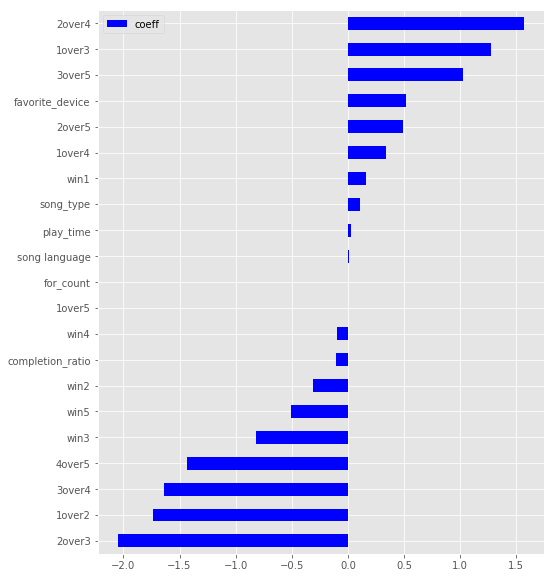

In [196]:
ax = df_coeffs.plot.barh(color = 'b')
t = np.arange(x.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

In [198]:
important_features = [columns[i] for i in np.argsort(abs(coeffs))][-1:-8:-1]
important_features

IndexError: list index out of range

In [143]:
# param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# lr = GridSearchCV(LogisticRegression(penalty='l2'), param_grid, cv=4, scoring='accuracy')
# lr.fit(x_train_1, y_train_1)
# print lr.best_params_

# GridSearchCV(cv=None,
#        estimator=LogisticRegression(C=1.0, intercept_scaling=1, dual=False, fit_intercept=True,
#           penalty='l2', tol=0.0001),
#        param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})
# You can use grid search to find out the best C value for you. Basically smaller C specify stronger regularization.



# tuned_parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}
# clf = GridSearchCV(LogisticRegression(solver='liblinear'), tuned_parameters, cv=3, scoring="accuracy")
# clf.fit(X_train, y_train)



{'C': 0.001}
